In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats

## Objective 
This Jupyter notebook shows the distribution of of duration for ARs making landfall in WA from 2014/15-2017/18. I need to do this all for the 10 degree data I'm doing. so coome back in later and fix this actually!

I also need to do
1. Re-do that script that pulls the times that the ARs are actually over WA
2. I need to copy over all the AR data into the Google Drive
3. Make the distributions of the other variables
4. Plot the rain times, AND plot the rain under each AR mask
5. Upload the photos that show where the ARs are touching WA at the first instance

In [ ]:
#path
#/home/disk/orca/csmall3/AR_testing_research/LPT_ARs/hourly_res/10N_10S_AR_outputs/data/AR/g0_0h/thresh1/systems

In [2]:
#need to concatenate these together since I split them up for my previous analysis
start_df = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Text_data/hourly_ARs/Deg_5_landfall/Start_WA_90_Per.csv')
start_df = start_df.drop(columns=['Unnamed: 0'])

non_start_df = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Text_data/hourly_ARs/Deg_5_landfall/Non_Start_WA_90_Per.csv')
non_start_df = non_start_df.drop(columns=['Unnamed: 0'])

non_df = pd.read_csv('/home/disk/orca/csmall3/AR_testing_research/Text_data/hourly_ARs/Deg_5_landfall/Non_MJO_WA_90_Per.csv')
non_df = non_df.drop(columns=['Unnamed: 0'])

WA_ARs=pd.concat([start_df, non_start_df, non_df], ignore_index=True)

In [5]:
WA_ARs['AR ID'].iloc[0]

'/home/disk/orca/csmall3/AR_testing_research/LPT_ARs/hourly_res/5N_5S_AR_outputs/data/AR/g0_0h/thresh1/systems/1998050100_1999043023/lpt_system_mask_AR.lptid00110.1000.nc'

In [6]:
#need to just filter for the dates we have
WA_ARs['Datetime'] = pd.to_datetime(WA_ARs['Date'])

WA_ARs_dated = WA_ARs.loc[(WA_ARs['Datetime'] >= '2014-05-01')
                     & (WA_ARs['Datetime'] < '2018-04-30')]

In [7]:
WA_ARs_dated #92 so far

,AR ID,Date,Landfall?,Datetime
16,/home/disk/orca/csmall3/AR_testing_research/LP...,2016-07-01T10:00:00,True,2016-07-01 10:00:00
17,/home/disk/orca/csmall3/AR_testing_research/LP...,2016-11-03T16:00:00,True,2016-11-03 16:00:00
18,/home/disk/orca/csmall3/AR_testing_research/LP...,2016-11-03T16:00:00,True,2016-11-03 16:00:00
19,/home/disk/orca/csmall3/AR_testing_research/LP...,2016-11-13T10:00:00,True,2016-11-13 10:00:00
20,/home/disk/orca/csmall3/AR_testing_research/LP...,2016-12-19T08:00:00,True,2016-12-19 08:00:00
...,...,...,...,...
500,/home/disk/orca/csmall3/AR_testing_research/LP...,2018-01-23T18:00:00,True,2018-01-23 18:00:00
501,/home/disk/orca/csmall3/AR_testing_research/LP...,2018-01-28T03:00:00,True,2018-01-28 03:00:00
502,/home/disk/orca/csmall3/AR_testing_research/LP...,2018-02-01T10:00:00,True,2018-02-01 10:00:00
503,/home/disk/orca/csmall3/AR_testing_research/LP...,2018-03-13T11:00:00,True,2018-03-13 11:00:00


In [8]:
#get the duration

WA_dur = []
for i in range(0,len(WA_ARs_dated)):
    ar_oi = xr.open_dataset(str(WA_ARs_dated['AR ID'].iloc[i]))

    WA_dur += [ar_oi['duration'].values]
WA_dur = np.array(WA_dur)
WA_dur = np.concatenate(WA_dur)

In [13]:
np.median(WA_dur)

205.0

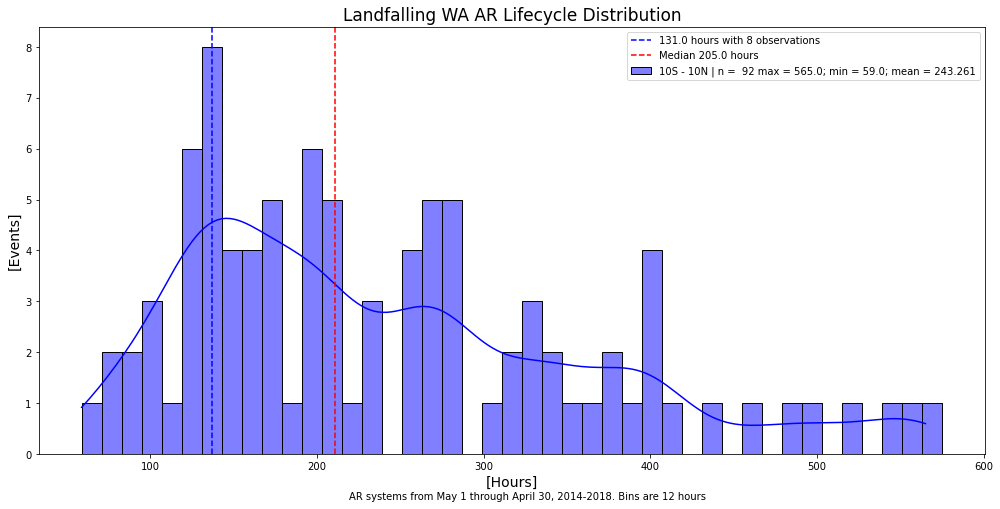

In [15]:
#plot the southern hemipshere

#plot the histograms
fig, ax = plt.subplots(figsize=[14, 7])
bwidths = 12

plt_1=sns.histplot(data=WA_dur, color="blue", label = '10S - 10N | n =  '+str(len(WA_dur))+ ' max = '+str(WA_dur.max())+'; min = '+str(WA_dur.min())+'; mean = '+str(np.around(WA_dur.mean(),3)), legend=True, ax=ax,binwidth=bwidths, kde=True, kde_kws={'clip':[48,1000],'bw_adjust':0.5})

box_ys_1=[h.get_height() for h in plt_1.patches]#give me the max value
box_xs_1 = [h.xy[0] for h in plt_1.patches] #gives the location of all of the values
ln_1=box_xs_1[box_ys_1.index(max(box_ys_1))]#gets the x value


ax.set_title('Landfalling WA AR Lifecycle Distribution', fontsize=17)
ax.set_xlabel('[Hours]', fontsize=14)
ax.set_ylabel('[Events]', fontsize=14)
# ax.set_xlim(48,600)
# ax.set_ylim(0,450)
ax.axvline(x=(ln_1+6), color='b', label=str(ln_1)+' hours with '+str(max(box_ys_1))+ ' observations', ls='--')
ax.axvline(x=(np.median(WA_dur)+6), color='r', label='Median '+str(np.median(WA_dur))+' hours', ls='--')

# plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$')
ax.legend()

plt.tight_layout()
plt.figtext(0.35, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
# figure.savefig("/home/disk/orca/csmall3/public_html/AR_Testing/Summer_Plots/Aug_7_23/SH_AR_Lifecycle_hist.png", dpi=350, bbox_inches='tight') 
plt.show()


## Proper plot
Only plot the distribution for rainfalling ARs in WA. The below does that from the list I've created already

In [2]:
#import file list
WA_ARs = pd.read_csv('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/text_data/WA_LF_ARs.csv')
WA_ARs = WA_ARs.drop(columns=['Unnamed: 0'])

In [5]:
clean_df=WA_ARs.loc[WA_ARs['Landfall?'] == True]
clean_df=clean_df.drop_duplicates(subset=['AR ID']).reset_index(drop=True)

In [7]:
#to set up the duration collection
WA_ARs_dated = clean_df

#get the duration

WA_dur = []
for i in range(0,len(WA_ARs_dated)):
    ar_oi = xr.open_dataset(str(WA_ARs_dated['AR ID'].iloc[i]))

    WA_dur += [ar_oi['duration'].values]
WA_dur = np.array(WA_dur)
WA_dur = np.concatenate(WA_dur)

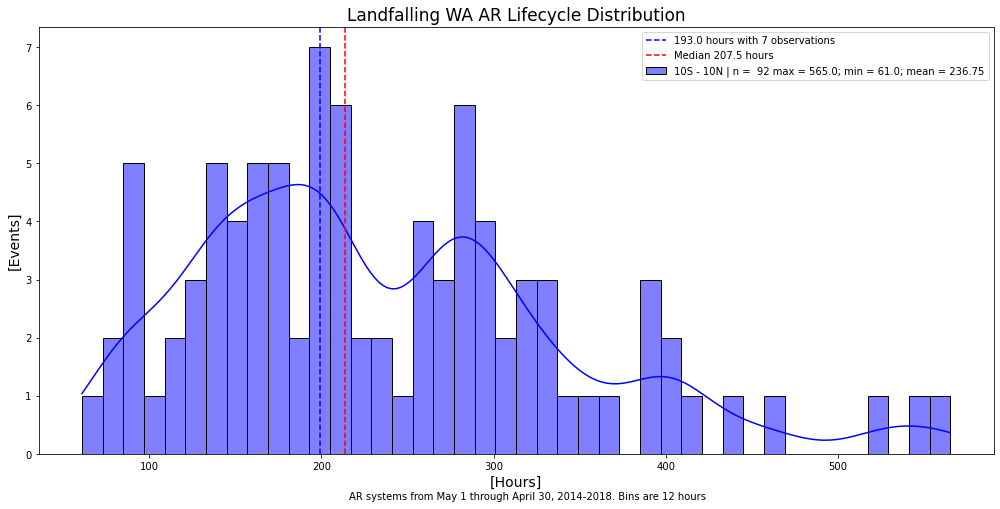

In [8]:
#plot the southern hemipshere

#plot the histograms
fig, ax = plt.subplots(figsize=[14, 7])
bwidths = 12

plt_1=sns.histplot(data=WA_dur, color="blue", label = '10S - 10N | n =  '+str(len(WA_dur))+ ' max = '+str(WA_dur.max())+'; min = '+str(WA_dur.min())+'; mean = '+str(np.around(WA_dur.mean(),3)), legend=True, ax=ax,binwidth=bwidths, kde=True, kde_kws={'clip':[48,1000],'bw_adjust':0.5})

box_ys_1=[h.get_height() for h in plt_1.patches]#give me the max value
box_xs_1 = [h.xy[0] for h in plt_1.patches] #gives the location of all of the values
ln_1=box_xs_1[box_ys_1.index(max(box_ys_1))]#gets the x value


ax.set_title('Landfalling WA AR Lifecycle Distribution', fontsize=17)
ax.set_xlabel('[Hours]', fontsize=14)
ax.set_ylabel('[Events]', fontsize=14)
# ax.set_xlim(48,600)
# ax.set_ylim(0,450)
ax.axvline(x=(ln_1+6), color='b', label=str(ln_1)+' hours with '+str(max(box_ys_1))+ ' observations', ls='--')
ax.axvline(x=(np.median(WA_dur)+6), color='r', label='Median '+str(np.median(WA_dur))+' hours', ls='--')

# plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$')
ax.legend()

plt.tight_layout()
plt.figtext(0.35, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Project_plots/WA_LF_Lifecycle_hist.png", dpi=350, bbox_inches='tight') 
plt.show()
